# Clustering - K-means



## Import libraries
---

In [148]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data

# Load and prepare data

In [149]:
# Reads the .csv file into variable df
df = pd.read_csv("../datasets/iris.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [150]:
# Separates the class variable in species
species = df.species

# Removes the species column from df
df = df.drop("species", axis=1)

# Standardizes df 
# Subtract mean from each value and divide by sd
df = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

# Displays the first 5 rows of df
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [151]:
df.shape

(150, 4)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### How do I know how many clusters to choose?

Perhaps look at the number of classes in the dataset, in this case, it's species of iris.

In [153]:
species.value_counts()

# I see there's 3 species being analysed, so I'll try 3 clusters to
# look for relationships between these species.

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Running k-means
---

### k-Means: Train the Model
We'll set up a `KMeans` object with the following parameters:

- `n_clusters`: Total number of clusters to make.
- `random_state`: Set to one to reproduce these results.
- `init`: How to initialize the k-means centers; we'll use `k-means++`.
- `n_init`: Number of times k-means would be run; the model returned would have the minimum value of `inertia`.

A few attributes of the `KMeans` object, which are also used in this demo are:
- `cluster_centers_`: Stores the discovered cluster centers.
- `labels_`: Label of each instance.
- `inertia`: Sum of square of distances of each instance from its corresponding center.
- `n_iter`: Number of iterations run to find the centers.

In [154]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10)

# Can experiment with different values of n_init to find a good balance between 
# computational efficiency and the quality of the clustering results for your particular dataset

# Fits the model to the data
km.fit(df)

# Displays the parameters of the fitted model
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': 0}

### k-Means: Visualize the Clusters

The code below creates a scatterplot of the first two features. Each point is colored according to its actual label. For comparison, each instance is drawn with a marker according to the label found by the clustering algorithm.

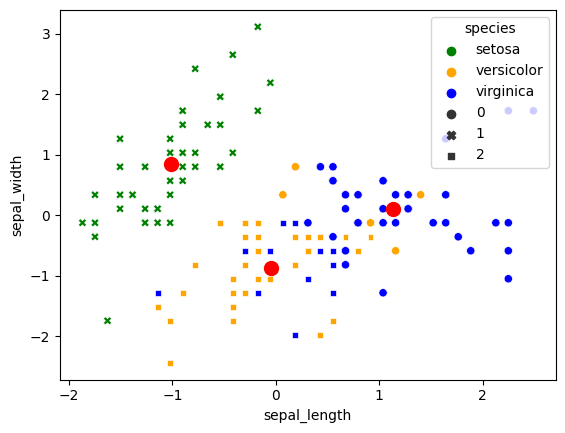

In [155]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length', # Do I just select two columns at random here to analyse?
    y='sepal_width', # Or perhaps I would look at combos of the 4 columns to see if there's any relationship
    data=df, 
    hue=species,
    style=km.labels_,
    palette=["green", "orange", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='o',
    s=100,
    c='red')


## k-means: Optimize via silhouette scores
---
The main challenge in k-means is to find the optimal number of clusters. We can set up a `GridSearchCV` object to search for the optimal parameters. For k-Mmeans, we require a custom scorer that computes the silhouette value for different number of clusters specified by `n_clusters`. The custom scorer is called `s2()` in the code below, where it uses `silhouette_score()` from the `sklearn.metrics` library to compute a score for an instance `X`. 

A silhouette score is a value in [-1,+1]. It is a means for comparing how similar an instance is to its corresponding cluster compared to its similarity with other clusters. Formally, it takes into account `cohesion` and `separation` to compute a silhouette value. A +1 or close to this score value indicates better clusters.

#### S2, GridSearchCV and Finding the Best Km

In [156]:
silhouette_scores = []
X = df[['sepal_length', 'sepal_width']]

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    kmeans.fit(X)
    cluster_labels = kmeans.predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

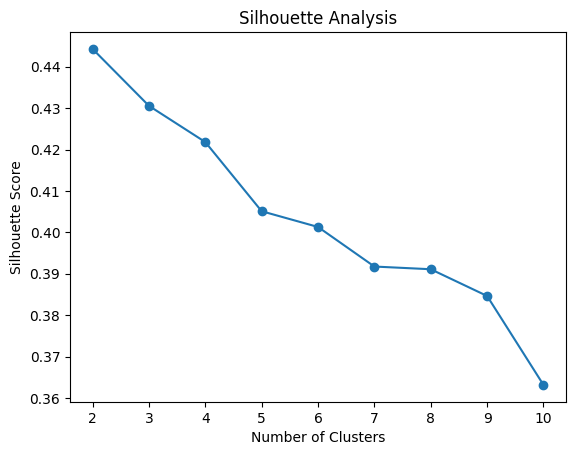

In [157]:
plt.plot(range(2, 11), silhouette_scores, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.show()

## Plot of Scores for Different Number of Clusters
The `grid` object has an attribute `cv_results_` through which the scores for different `n_clusters` can be accessed.

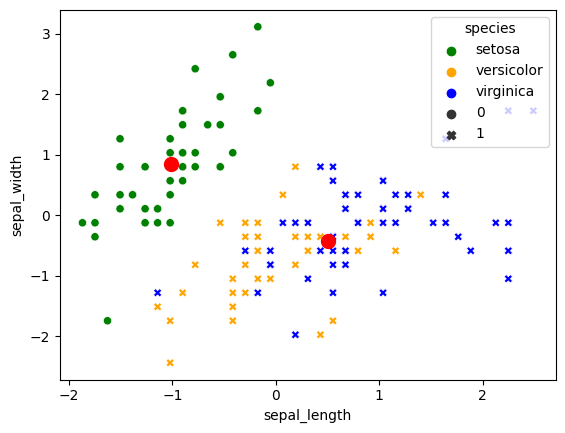

In [158]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=2,
    random_state=1,
    init='k-means++',
    n_init=10)

# Fits the model to the data
km.fit(df)

# Creates a scatter plot
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    data=df, 
    hue=species,
    style=km.labels_,
    palette=["green", "orange", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    marker='o',
    s=100,
    c='red')


In [159]:
km = KMeans(n_clusters=2)
species_predicted = km.fit_predict(df[['sepal_length','sepal_width','petal_length','petal_width']])
species_predicted

/Users/robertphillips/Documents/intro-to-data-analysis/data_intro_venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [160]:
df["cluster"]=species_predicted

In [161]:
df['cluster'].value_counts()

cluster
0    100
1     50
Name: count, dtype: int64